## What is classification?

Classification is a supervised machine learning problem of predicting which category or class a particular observation belongs to based on its features.

For instance, one popular classification problem is Image classification. We may want to classify images into different classes: dog, cat, donkey, and human.

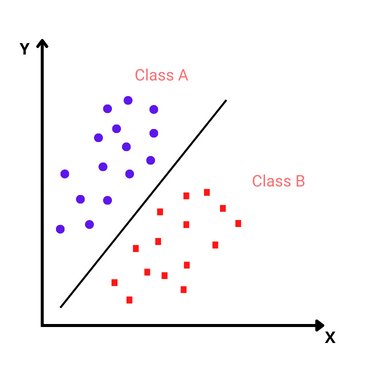

### There are two types of classification problems:

1. Binomial or binary classification: has exactly two classes to choose from.
2. Multinomial or Multiclass classification: has three or more classes to choose from.

### Some examples of classification algorithms:

- Logistic regression
- Decision trees
- Random forest
- Artificial neural networks
- XGBoost

## Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report

## Loading the dataset

- Social Network Ads

In [3]:
social_N_data = pd.read_csv('Social_Network_Ads.csv.xls')
pd.concat([social_N_data.head(), social_N_data.tail()])

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


## Exploratory Data Analysis

Analyzing the data first is key to understanding its characteristics. We will begin with checking the missing values.

In [4]:
social_N_data.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

### Check for the total number of those who purchased and those who did not purchase:

<Axes: xlabel='Purchased', ylabel='count'>

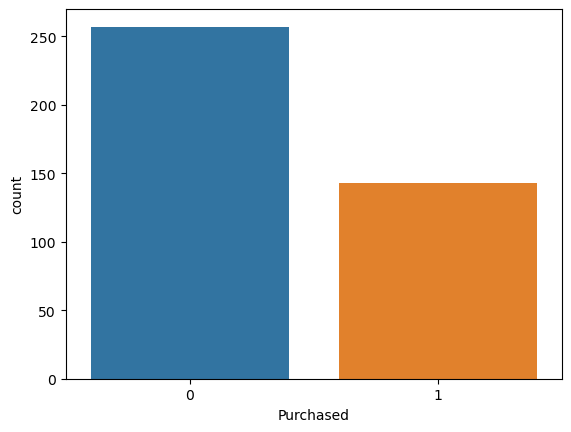

In [5]:
sns.countplot(x='Purchased', data=social_N_data)

**We can also check the age distribution in the dataset:**

C:\Users\piush\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


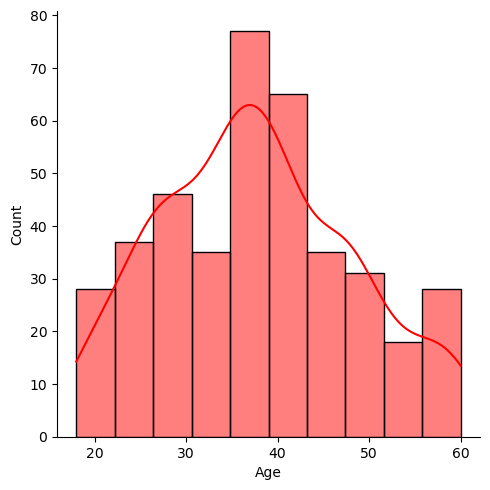

In [6]:
sns.displot(x='Age', data=social_N_data, color='red', kde=True)

### Cleaning the data

We will use the Gender, Age, and EstimatedSalary columns from the dataset for the logistic regression. This means that we do not require the UserID column. Thus we will drop it.

In [7]:
social_N_data.drop('User ID', axis=1, inplace=True)
social_N_data

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


### Changing categorical data into dummies

Let's look at the info of the dataset to get a general idea of what it contains.

In [8]:
social_N_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [9]:
gender = pd.get_dummies(social_N_data['Gender'], drop_first=True)

In [10]:
social_N_data.drop('Gender',axis=1,inplace=True)

In [11]:
social_N_data = pd.concat([social_N_data,gender], axis=1)

In [12]:
social_N_data

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,True
1,35,20000,0,True
2,26,43000,0,False
3,27,57000,0,False
4,19,76000,0,True
...,...,...,...,...
395,46,41000,1,False
396,51,23000,1,True
397,50,20000,1,False
398,36,33000,0,True


### Splitting the data into independent(X) and dependent(y) variables

In [13]:
X = social_N_data.iloc[:,[0,1,3]] # Age, EstimatedSalary and Male
X.head()

,Age,EstimatedSalary,Male
0,19,19000,True
1,35,20000,True
2,26,43000,False
3,27,57000,False
4,19,76000,True


In [14]:
y = social_N_data.iloc[:, 2] # Purchased
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

### Feature scaling

Feature scaling is a method used to normalize the range of independent variables. The method enables the independent variables to be in the same range.

When working with large datasets, scaling plays a significant role in improving the performance of the model.

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-1.78179743, -1.49004624,  1.02020406],
       [-0.25358736, -1.46068138,  1.02020406],
       [-1.11320552, -0.78528968, -0.98019606],
       ...,
       [ 1.17910958, -1.46068138, -0.98019606],
       [-0.15807423, -1.07893824,  1.02020406],
       [ 1.08359645, -0.99084367, -0.98019606]])

### Splitting the dataset into train and test sets

Split the dataset into training and testing sets using the train_test_split function.

In [16]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(280, 3)
(120, 3)
(280,)
(120,)


### Fitting the Naive Bayes model and predicting test results

In [17]:
# Building the Model(Classifier)
classifier = GaussianNB()

# Training the Model(Classifier)
classifier.fit(X_train,y_train)

GaussianNB()

In [18]:
yPred = classifier.predict(X_test)
yPred[:10]

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [19]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : yPred})
result[:15]

,Actual,Predicted
398,0,0
125,0,0
328,1,1
339,1,1
172,0,0
342,0,0
197,0,0
291,1,1
29,0,0
284,0,1


In [22]:
from sklearn.metrics import accuracy_score

print("Accuracy Score Of Classifier is:", accuracy_score(y_test,yPred))

Accuracy Score Of Classifier is: 0.8416666666666667


### Evaluating the model

There are various ways of checking the performance of the model.

### Using predict_proba

It returns the matrix of probabilities that the predicted output is equal to zero or one.

In [23]:
x = classifier.predict_proba(X_test)
y = pd.DataFrame(x, columns=['0','1'])
y['0'] = round(y['0']*100)
y['1'] = round(y['1']*100)
y

,0,1
0,91.0,9.0
1,81.0,19.0
2,23.0,77.0
3,10.0,90.0
4,55.0,45.0
...,...,...
115,44.0,56.0
116,82.0,18.0
117,82.0,18.0
118,98.0,2.0


### Using confusion matrix

From the Scikit-learn metrics module, we import confusion_matrix. The confusion matrix is the number of correct and incorrect predictions column-wise, showing the following values:

- True negatives(TN) in the upper-left position.
- False negatives(FN) in the lower-left position.
- False positives(FP) in the upper-right position.
- True positives(TP) in the lower-right position.

In [26]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,yPred)
cf_matrix

array([[62, 10],
       [ 9, 39]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted label')

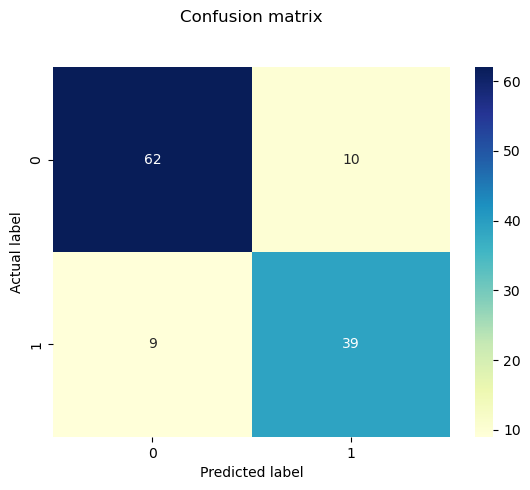

In [27]:
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

>**To calculate the model's accuracy from the confusion matrix, we divide the sum of TN and TP by the sum of all the predictions.**

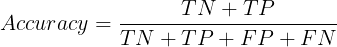

In [31]:
Accuracy = (62 + 39)/(62 + 39 + 10 + 9)
Accuracy

0.8416666666666667

In [32]:
# Also same result from sklearn accuracy_score

from sklearn.metrics import accuracy_score

accuracy_score(y_test,yPred)

0.8416666666666667

### Confusion matrix metrics

The classification_report gives a more comprehensive report of the model's performance.

In [34]:
target_names = ['will NOT PURCHASE', 'will PURCHASE']
print(classification_report(y_test, yPred,target_names=target_names))

                   precision    recall  f1-score   support

will NOT PURCHASE       0.87      0.86      0.87        72
    will PURCHASE       0.80      0.81      0.80        48

         accuracy                           0.84       120
        macro avg       0.83      0.84      0.84       120
     weighted avg       0.84      0.84      0.84       120

